In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt

(train_img, train_lab), (test_img, test_lab) = datasets.cifar10.load_data()

train_img = train_img/255.0
test_img = test_img/255.0

class_names = ['aeroplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

layer = models.Sequential()

layer.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(32,32,3)))
layer.add(layers.MaxPooling2D((2,2)))
layer.add(layers.Conv2D(64,(3,3), activation = 'relu'))
layer.add(layers.MaxPooling2D((2,2)))
layer.add(layers.Conv2D(32,(3,3), activation = 'relu'))
layer.add(layers.MaxPooling2D((2,2)))

layer.summary()

In [ ]:
layer.add(layers.Flatten())
layer.add(layers.Dense(64, activation='relu'))
layer.add(layers.Dense(10))

layer.summary()

In [5]:
layer.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = layer.fit(train_img, train_lab, epochs=10, validation_data=(test_img, test_lab))

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7813 - accuracy: 0.7255 - val_loss: 0.9440 - val_accuracy: 0.6784
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7578 - accuracy: 0.7353 - val_loss: 0.9200 - val_accuracy: 0.6839
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7357 - accuracy: 0.7409 - val_loss: 0.9269 - val_accuracy: 0.6876
Epoch 4/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7099 - accuracy: 0.7518 - val_loss: 0.9124 - val_accuracy: 0.6887
Epoch 5/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.6896 - accuracy: 0.7584 - val_loss: 0.9551 - val_accuracy: 0.6815
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6730 - accuracy: 0.7644 - val_loss: 0.9052 - val_accuracy: 0.6966
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6588 - accuracy: 0.7690 - val_loss: 0.9086 -

313/313 - 3s - loss: 0.9118 - accuracy: 0.7010 - 3s/epoch - 9ms/step
0.7009999752044678


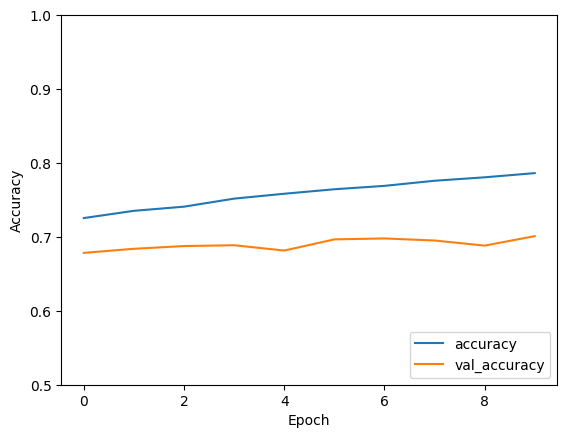

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = layer.evaluate(test_img, test_lab, verbose=2)

print(test_acc)